In [89]:
models= ["cnn_lenet", "mlp4", "cnn_vgg", "lstm1v0", "lstm1", "lstm2", "blstm1", "blstm2", "lstm_fcn", "cnn_resnet"]

In [90]:
import pandas as pd

results = [pd.read_pickle(f'results_{model}_aug_noscale.pickle') for model in models]

FileNotFoundError: [Errno 2] No such file or directory: 'results_blstm1_aug_noscale.pickle'

In [88]:
import numpy as np

In [64]:
lengths = [len(r) for r in results]

In [60]:
print(lengths)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [65]:
model_column = np.concatenate([[model] * 10 for model in models])

In [66]:
np.mean(results,1)

array([[4.78817191, 2.18645744, 1.68536493, 1.34229648, 0.62716546],
       [6.11306148, 2.46825726, 1.85219697, 1.42744185, 0.52536702],
       [5.09074821, 2.25374768, 1.75377557, 1.45500702, 0.6047433 ],
       [4.88054752, 2.20512202, 1.72342582, 1.40439309, 0.61991826],
       [4.68622451, 2.16334295, 1.69036827, 1.40227892, 0.63482159],
       [5.13767085, 2.26389506, 1.74434257, 1.40103076, 0.59993367],
       [4.47047977, 2.11245805, 1.63168896, 1.29392431, 0.65117835],
       [4.4667979 , 2.10893435, 1.62944535, 1.31285951, 0.65184934],
       [4.36380081, 2.0856915 , 1.59688627, 1.29003566, 0.66026097],
       [4.38755515, 2.09233526, 1.61188334, 1.31919489, 0.65907576]])

In [67]:
np.array(results[0]).shape

(10, 5)

In [70]:
results_data = pd.DataFrame(np.array(results).reshape(-1, 5), columns=["MSE", "RMSE", "MAE", "MAD", "R2"])

In [71]:
results_data["model"] = model_column

In [72]:
melted = pd.melt(results_data, id_vars=["model"])

In [73]:
import seaborn as sns

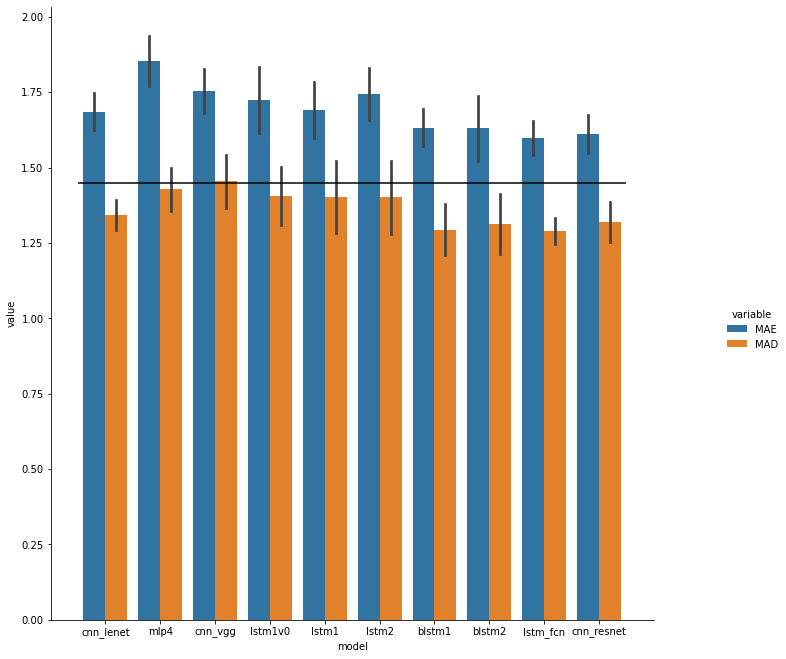

In [74]:
ff = sns.catplot(data=melted[(melted["variable"]=="MAE") | (melted["variable"]=="MAD")], kind="bar", ci="sd", y="value", hue="variable", x="model")
ff.figure.set_size_inches([12, 10])
ff.axes[0][0].hlines(1.45, *ff.axes[0][0].get_xlim(), 'k')

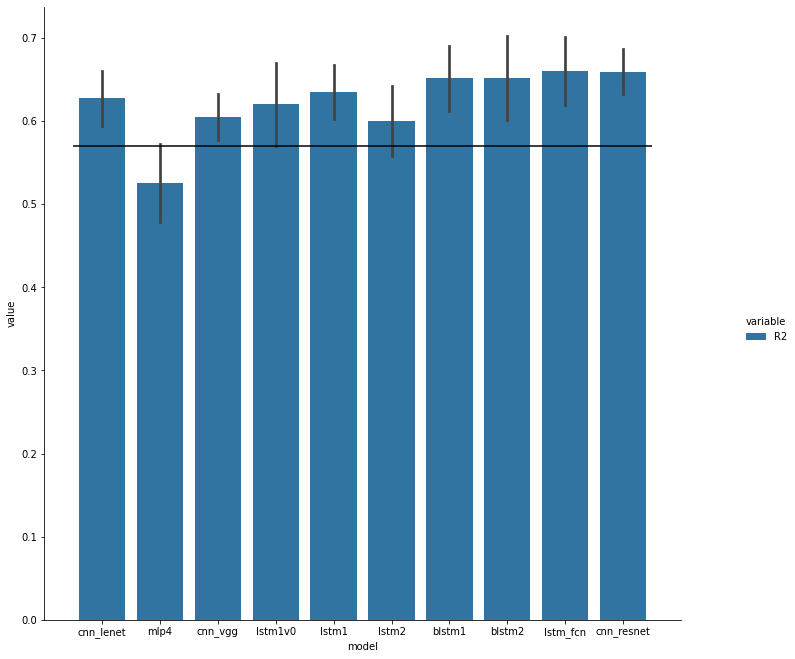

In [75]:
ff = sns.catplot(data=melted[melted["variable"]=="R2"], kind="bar", ci="sd", y="value", hue="variable", x="model")
ff.figure.set_size_inches([12, 10])
ff.axes[0][0].hlines(0.57, *ff.axes[0][0].get_xlim(), 'k')

In [ ]:
# Choose different train/test split in every experiment
# Run all architectures with each train/test split
# Compute the median absolute error (!) instead / in addition to mean 
# Compute coefficient of determination 
# BLSTM with FCN? 
# Control experiments with SGL or LASSO PCR: what's the generalization profile of these algorithms?
# 
# Run basic experiment with/without augmentation
# Run generalization experiments with/without augmentation
